In [17]:
import matplotlib.pyplot as plt
import numpy as np
from eval_control_structures_experiment import plot_data_dict, DATA, CONTROL_MODES, fill_data_dict, get_setting_from_measurements
import os

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size' : 17,
    'figure.autolayout' : True,
    "axes.titlesize":17,
    "axes.labelsize":17,
})


In [18]:
fill_data_dict()

Found: 54 configs.
NetworkMeasurement(control_mode='PWM', latency=0.02, motor_time_constant=0.06, seeds=[17, 15, 16], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.02, motor_time_constant=0.1, seeds=[34, 33, 35], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.0, motor_time_constant=0.04, seeds=[102, 100, 101], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.0, motor_time_constant=0.12, seeds=[106, 108, 107], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.02, motor_time_constant=0.12, seeds=[44, 43, 42], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.015, motor_time_constant=0.04, seeds=[5, 4, 3], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.0, motor_time_constant=0.08, seeds=[103, 105, 104], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.02, motor_time_constant=0.04, seeds=[6, 8, 7], data=[])
NetworkMeasurement(control_mode='PWM', latency=0.01, motor_time_constant=0.06, seeds=[10, 11, 9], data=[])
NetworkMea

In [19]:
# function for setting the colors of the box plots pairs
from pylab import setp
def setBoxColors(bp, color='blue'):
    for i in range(len(bp['boxes'])):
        setp(bp['boxes'][i], color=color)
        setp(bp['caps'][0], color=color)
        setp(bp['caps'][1], color=color)


COLORS = ['blue', 'green', 'red']

In [20]:
CONTROL_MODES

['PWM', 'AttitudeRate', 'Attitude']

In [21]:
meanprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

def display_box_plot(latency: float):
    # for latency in [0.01, 0.015, 0.020]:
    
    fig = plt.figure()
    ax = plt.axes()
    
    displayed_control_modes = CONTROL_MODES

    # plt.hold(True)

    iteration = 0

    # for control_mode in DATA.keys():
    for control_mode in displayed_control_modes:
        iteration += 1
        ys = []
        xs = [0.04, 0.08, 0.12] #, 0.08, 0.12]
        for mtc in xs:
            m = get_setting_from_measurements(
                DATA[control_mode], mtc=mtc, latency=latency)
            assert m is not None
            ys.append(m.data)
                
        positions = [iteration+i*5 for i in range(len(xs))]  # e.g. [1, 4, 7, 10, ...]
    
        A = np.array(ys).T # box plot expects column-wise data
        mtc_strings = [str(x) for x in xs]
        bp = plt.boxplot(A,positions=positions, meanprops=meanprops, showmeans=False) #, label=f'Latency={latency} [{control_mode}]')
        setBoxColors(bp, COLORS[iteration-1])
    
    ax.set_xticks([2, 7, 12])
    ax.set_xticklabels(mtc_strings)

    plt.ylim((-1, 21))
    plt.ylabel('Mean Flight Time [s]')
    plt.xlabel('Motor Time constant [s]')
    # plt.title(f'Comparison Control Structure (Latency={int(latency*1000)}ms)')
    leg = plt.legend(displayed_control_modes, loc= 'upper left', fontsize=13)
    for i, col in enumerate(COLORS):
        leg.legendHandles[i].set_color(col)
    plt.show()
    save_path = '/var/tmp/figures'
    os.makedirs(save_path, exist_ok=True)
    fig.savefig(os.path.join(save_path, f'control_structure_comparison_latency_{latency*1000:0.0f}ms.pdf'))
    plt.show()
    plt.tight_layout()
    print(ys)

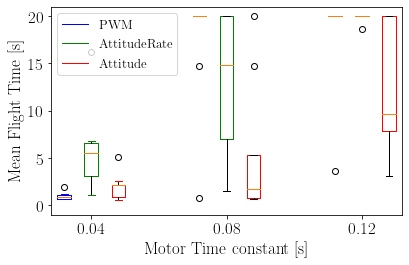

[[2.54, 0.74, 1.12, 2.19, 0.6, 0.84, 2.17, 5.08, 2.17], [3.52, 0.81, 0.75, 20.0, 5.32, 14.67, 0.72, 1.75, 0.7], [3.12, 20.0, 20.0, 9.46, 13.37, 7.87, 20.0, 9.67, 4.63]]


<Figure size 432x288 with 0 Axes>

In [22]:
display_box_plot(latency=0.020)

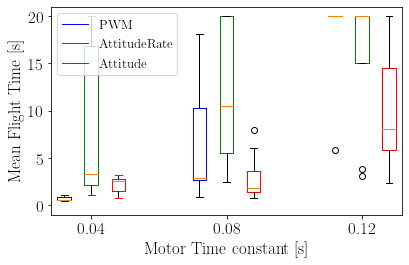

[[2.67, 2.59, 3.22, 2.82, 1.47, 0.98, 2.07, 0.77, 2.83], [0.81, 1.41, 1.82, 7.95, 1.97, 6.1, 1.43, 3.65, 0.84], [2.35, 20.0, 14.53, 13.32, 20.0, 8.06, 5.85, 7.21, 4.41]]


<Figure size 432x288 with 0 Axes>

In [23]:
display_box_plot(latency=0.015)

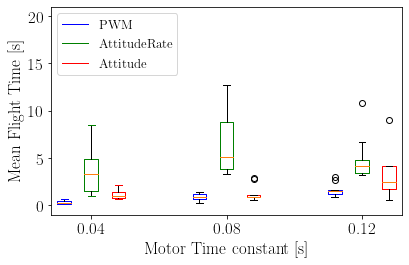

[[1.37, 0.71, 1.41, 2.2, 0.84, 1.68, 0.74, 0.7, 0.94], [0.74, 1.05, 0.85, 0.91, 2.9, 0.94, 0.93, 2.81, 0.6], [4.13, 1.97, 0.58, 1.73, 2.47, 3.15, 1.75, 9.0, 4.16]]


<Figure size 432x288 with 0 Axes>

In [24]:
display_box_plot(latency=0.0)